# Importation de libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.cluster import KMeans #importation de Kmeans
from sklearn.model_selection import train_test_split 
from collections import Counter
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [14]:
dataF = pd.read_csv("Data7.txt",sep="\t")

# Attribute selection

In [15]:
dataF.isna().sum()

Time                                                                                                             3
Country Name                                                                                                     5
GDP per capita, PPP (current international $)                                                                   27
Suicide mortality rate (per 100,000 population)                                                                 39
Renewable energy consumption (% of total final energy consumption)                                              11
Terrestrial and marine protected areas (% of total territorial area)                                           222
Forest area (% of land area)                                                                                    13
Total natural resources rents (% of GDP)                                                                        19
Life expectancy at birth, total (years)                                         

In [18]:
dataF = dataF.drop(['Time',
                    'Terrestrial and marine protected areas (% of total territorial area)',
                    'Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)',
                    'Military expenditure (% of GDP)','Armed forces personnel, total',
                    'Maternal mortality ratio (national estimate, per 100,000 live births)',
                    'Refugee population by country or territory of asylum'], axis = 1)

# Object selection

In [19]:
dataF=dataF.dropna(axis=0)
dataF = dataF.reset_index(drop=True) # to regenerate consecutive integer row names
dataF.head()

,Country Name,"GDP per capita, PPP (current international $)","Suicide mortality rate (per 100,000 population)",Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Total natural resources rents (% of GDP),"Life expectancy at birth, total (years)","Probability of dying at age 5-14 years (per 1,000 children age 5)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Fertility rate, total (births per woman)","Birth rate, crude (per 1,000 people)",Refugee population by country or territory of origin,International migrant stock (% of population),CO2 emissions (kt),Methane emissions (kt of CO2 equivalent)
0,Afghanistan,1637.377987,5.1,14.839806,2.067825,0.588007,61.028,10.0,65.245592,5.977,39.829,3054709.0,0.365658,8463.436,13493.3000
1,Albania,9628.025783,7.8,37.115330,28.332116,2.033753,76.562,2.6,21.277828,1.660,12.001,14772.0,1.818957,4598.418,2592.3700
2,Algeria,12655.137410,3.3,0.258072,0.805294,26.917567,74.938,4.3,33.635820,2.860,24.504,6689.0,0.679773,119177.500,47575.5000
3,Angola,6230.297028,5.7,54.193837,46.907837,39.003947,55.350,24.6,33.787247,6.194,45.656,134858.0,0.360741,29057.308,18602.4000
4,Antigua and Barbuda,20134.817247,0.3,0.000000,22.272728,0.000000,75.823,2.0,22.528876,1.988,16.547,30.0,30.277533,524.381,42.4249


In [20]:
corr=dataF.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,"GDP per capita, PPP (current international $)","Suicide mortality rate (per 100,000 population)",Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Total natural resources rents (% of GDP),"Life expectancy at birth, total (years)","Probability of dying at age 5-14 years (per 1,000 children age 5)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Fertility rate, total (births per woman)","Birth rate, crude (per 1,000 people)",Refugee population by country or territory of origin,International migrant stock (% of population),CO2 emissions (kt),Methane emissions (kt of CO2 equivalent)
"GDP per capita, PPP (current international $)",1,0.14,-0.5,-0.073,0.07,0.61,-0.34,-0.12,-0.51,-0.57,-0.11,0.73,0.1,0.0082
"Suicide mortality rate (per 100,000 population)",0.14,1,-0.14,0.15,-0.15,0.13,-0.11,-0.21,-0.33,-0.36,-0.083,-0.058,0.12,0.11
Renewable energy consumption (% of total final energy consumption),-0.5,-0.14,1,0.2,0.038,-0.67,0.52,0.15,0.67,0.67,-0.013,-0.36,-0.15,-0.082
Forest area (% of land area),-0.073,0.15,0.2,1,-0.035,0.0019,-0.074,-0.31,-0.046,-0.054,-0.11,-0.2,-0.026,-0.027
Total natural resources rents (% of GDP),0.07,-0.15,0.038,-0.035,1,-0.3,0.12,0.34,0.36,0.38,0.069,0.14,-0.048,-0.024
"Life expectancy at birth, total (years)",0.61,0.13,-0.67,0.0019,-0.3,1,-0.57,-0.31,-0.82,-0.86,-0.11,0.36,0.13,0.061
"Probability of dying at age 5-14 years (per 1,000 children age 5)",-0.34,-0.11,0.52,-0.074,0.12,-0.57,1,0.15,0.55,0.54,0.034,-0.21,-0.084,-0.058
"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",-0.12,-0.21,0.15,-0.31,0.34,-0.31,0.15,1,0.31,0.34,0.27,0.087,0.13,0.23
"Fertility rate, total (births per woman)",-0.51,-0.33,0.67,-0.046,0.36,-0.82,0.55,0.31,1,0.98,0.2,-0.27,-0.16,-0.12
"Birth rate, crude (per 1,000 people)",-0.57,-0.36,0.67,-0.054,0.38,-0.86,0.54,0.34,0.98,1,0.17,-0.31,-0.17,-0.13


# Problematique ?
Est-ce que les pays qui attirent le plus de migrants sont ceux qui ont des conditions environnementales favorables (faible PM2.5 et grandes zones forestières) ou ceux où la participation dans le travail et plus forte? Est-ce que le niveau de vie joue - t-il un rôle important au moment de choisir un pays où immigrer (population growth, suicide mortality rate)

In [154]:
mycolumns=['GDP per capita, PPP (current international $)',
           'Forest area (% of land area)',
           'Total natural resources rents (% of GDP)',
           'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
           'CO2 emissions (kt)','International migrant stock (% of population)']

In [155]:
dataF2=dataF[mycolumns]

In [156]:
corr2=dataF2.corr()
corr2.style.background_gradient(cmap='coolwarm').set_precision(2)

,"GDP per capita, PPP (current international $)",Forest area (% of land area),Total natural resources rents (% of GDP),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",CO2 emissions (kt),International migrant stock (% of population)
"GDP per capita, PPP (current international $)",1,-0.073,0.07,-0.12,0.1,0.73
Forest area (% of land area),-0.073,1,-0.035,-0.31,-0.026,-0.2
Total natural resources rents (% of GDP),0.07,-0.035,1,0.34,-0.048,0.14
"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",-0.12,-0.31,0.34,1,0.13,0.087
CO2 emissions (kt),0.1,-0.026,-0.048,0.13,1,-0.011
International migrant stock (% of population),0.73,-0.2,0.14,0.087,-0.011,1


In [180]:
dataF2.rename(columns = {'GDP per capita, PPP (current international $)': 'GDP',
                         'Forest area (% of land area)':'Forest area',
                         'Total natural resources rents (% of GDP)':'Total natural resources rents',
                         'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)':'PM2.5 air pollution',
                         'CO2 emissions (kt)':'CO2 emissions',
                        'International migrant stock (% of population)':'International migrant stock'}, inplace=True)
dataF2.head()

/Users/catalinagonzalez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,GDP,Forest area,Total natural resources rents,PM2.5 air pollution,CO2 emissions,International migrant stock
0,1637.377987,2.067825,0.588007,65.245592,8463.436,0.365658
1,9628.025783,28.332116,2.033753,21.277828,4598.418,1.818957
2,12655.137410,0.805294,26.917567,33.635820,119177.500,0.679773
3,6230.297028,46.907837,39.003947,33.787247,29057.308,0.360741
4,20134.817247,22.272728,0.000000,22.528876,524.381,30.277533


## Nouvelle variable, definition des classes d'objets 

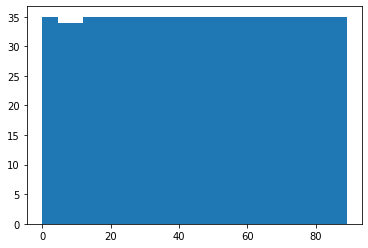

In [181]:
#n, bins, patches=plt.hist(dataF2['GDP per capita, PPP (current international $)'],bins=[646,5300,16800,118000])

n, bins, patches=plt.hist(dataF2['International migrant stock'],bins=[0,0.8,2.2,4.5,12,89])



In [211]:
n,sum(n)

(array([35., 35., 35., 34., 35.]), 174.0)

In [182]:
bins

array([ 0. ,  0.8,  2.2,  4.5, 12. , 89. ])


pourcentage=[]
for i in range(len(dataF2)):
    if dataF2['International migrant stock'][i]>=646 and dataF2['GDP per capita, PPP (current international $)'][i]<5300 :
        pourcentage.append('low')
    elif dataF2['GDP per capita, PPP (current international $)'][i]>=5300 and dataF2['GDP per capita, PPP (current international $)'][i]<16800 :
        pourcentage.append('middle')
    elif dataF2['GDP per capita, PPP (current international $)'][i]>=16800 and dataF2['GDP per capita, PPP (current international $)'][i]<118000 :
        pourcentage.append('hight')

dataF2['GDP per capita, PPP (current international $)']=pourcentage

In [183]:
pourcentage=[]
for i in range(len(dataF2)):
    if dataF2['International migrant stock'][i]<0.8:
        pourcentage.append('< 0.8%')
    elif dataF2['International migrant stock'][i]>=0.8 and dataF2['International migrant stock'][i]<2.2 :
        pourcentage.append('0.8-2.2%')
    elif dataF2['International migrant stock'][i]>=2.2 and dataF2['International migrant stock'][i]<4.5 :
        pourcentage.append('2.2-4.5%')
    elif dataF2['International migrant stock'][i]>=4.5 and dataF2['International migrant stock'][i]<12 :
        pourcentage.append('4.5-12%')
    elif dataF2['International migrant stock'][i]>=12 and dataF2['International migrant stock'][i]<89:
        pourcentage.append('12-89%')
        
dataF2['International migrant stock']=pourcentage

/Users/catalinagonzalez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [184]:
dataF2.head()

,GDP,Forest area,Total natural resources rents,PM2.5 air pollution,CO2 emissions,International migrant stock
0,1637.377987,2.067825,0.588007,65.245592,8463.436,< 0.8%
1,9628.025783,28.332116,2.033753,21.277828,4598.418,0.8-2.2%
2,12655.137410,0.805294,26.917567,33.635820,119177.500,< 0.8%
3,6230.297028,46.907837,39.003947,33.787247,29057.308,< 0.8%
4,20134.817247,22.272728,0.000000,22.528876,524.381,12-89%


# Visualisation des données

In [185]:
dataF3=dataF2

In [186]:
dataF3.describe(include='all')

,GDP,Forest area,Total natural resources rents,PM2.5 air pollution,CO2 emissions,International migrant stock
count,174.000000,174.000000,174.000000,174.000000,1.740000e+02,174
unique,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,12-89%
freq,NaN,NaN,NaN,NaN,NaN,35
mean,16100.394404,31.769154,9.235423,29.112650,1.803082e+05,NaN
std,17510.275230,23.224987,12.510526,17.243744,8.039393e+05,NaN
min,646.295395,0.000000,0.000000,7.152866,6.233900e+01,NaN
25%,3420.525795,11.657300,0.904782,17.285109,2.437638e+03,NaN
50%,9811.045521,31.189832,3.150320,25.996765,1.191958e+04,NaN
75%,20937.548169,49.328454,12.279648,34.289539,7.244342e+04,NaN


### Normlaisation des données

Pour déterminer des groupes de vins qui se ressemblent, on commence par normaliser les données car nos
variables ont des unités très différentes. Cette étape permet de donner le même poids à chaque variable (pour
que les variables ayant des valeurs plus grandes n’aient pas une influence disproportionnée).

In [187]:
cols =list(dataF3.columns)
cols.remove('International migrant stock') 

In [188]:
dataF3[cols]=dataF3[cols].apply(zscore,axis=0)

/Users/catalinagonzalez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [189]:
dataF3.describe()

,GDP,Forest area,Total natural resources rents,PM2.5 air pollution,CO2 emissions
count,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02
mean,5.806339e-17,-1.843991e-16,-1.547294e-17,-5.710630e-17,6.540107e-18
std,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00
min,-8.851203e-01,-1.371835e+00,-7.403427e-01,-1.277168e+00,-2.248504e-01
25%,-7.262286e-01,-8.684567e-01,-6.678123e-01,-6.878828e-01,-2.218873e-01
50%,-3.602171e-01,-2.501589e-02,-4.878024e-01,-1.812180e-01,-2.100589e-01
75%,2.770438e-01,7.582341e-01,2.440354e-01,3.010849e-01,-1.345575e-01
max,5.808647e+00,2.877375e+00,3.614905e+00,4.168389e+00,1.072287e+01


In [190]:
dataF3.head()

,GDP,Forest area,Total natural resources rents,PM2.5 air pollution,CO2 emissions,International migrant stock
0,-0.828357,-1.282543,-0.693206,2.101471,-0.214370,< 0.8%
1,-0.370699,-0.148416,-0.577310,-0.455669,-0.219192,0.8-2.2%
2,-0.197324,-1.337061,1.417460,0.263065,-0.076258,< 0.8%
3,-0.565301,0.653709,2.386345,0.271872,-0.188680,< 0.8%
4,0.231068,-0.410068,-0.740343,-0.382908,-0.224274,12-89%


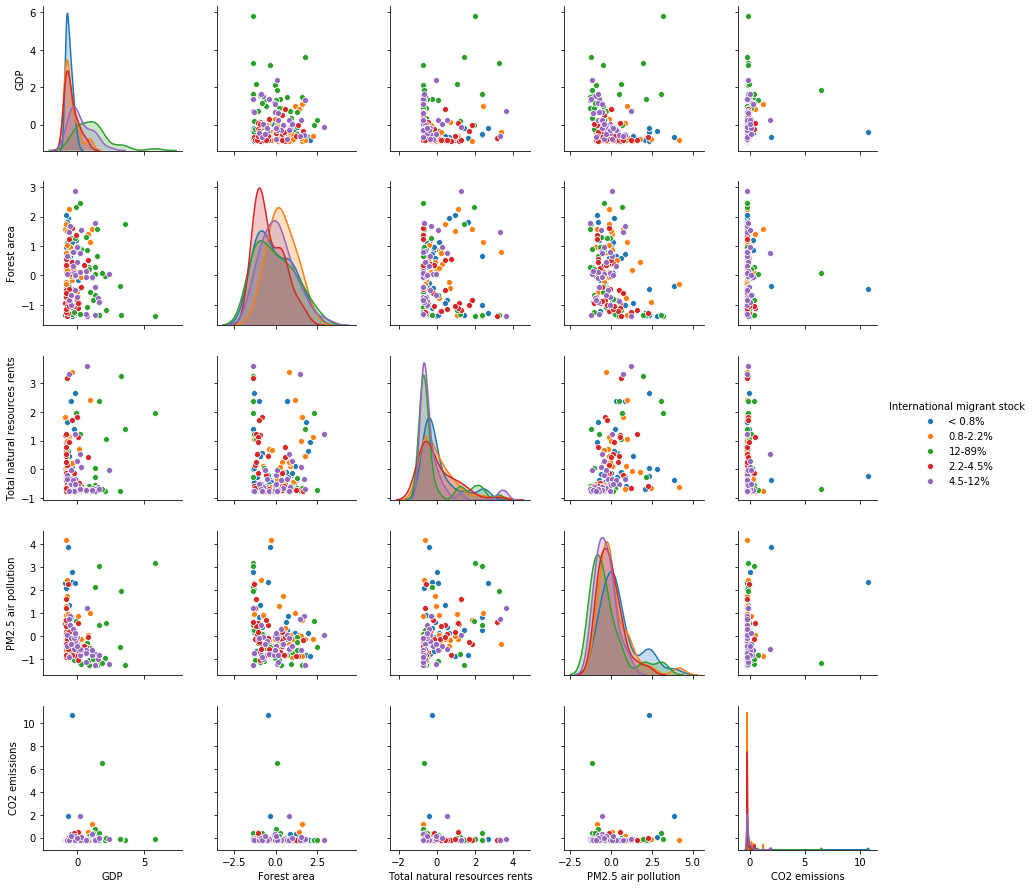

In [192]:
#sns.pairplot(data=dataF3, hue="GDP")
sns.pairplot(data=dataF3, hue='International migrant stock')

## Identification des outliers (?)

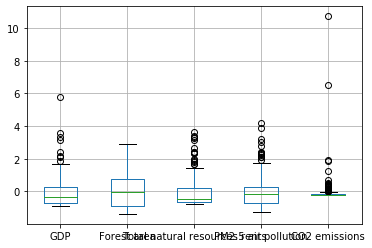

In [193]:
dataF3.boxplot()

# Recherche de clusters
On réalise un clustering hiérarchique en méthode single avec distance euclidienne sur notre jeu
de données. Nous cherchons ici à déterminer des clusters de type contour. Cette représentation nous permet
aussi de prendre une décision quant à nos outliers.

## Kmeans 
Nous cherchons des clusters sphériques grâce à la méthode des k-means.
Afin de déterminer le nombre de groupes que l’on va créer, on fait varier le nombre de groupes dans notre
k-means puis on calcule la SSE totale de notre clustering. Le nombre de groupes que l’on retient est
celui qui donne une SSE suffisamment faible avec un nombre de groupes suffisamment petit.

In [194]:
#classes = dataF3['GDP']
#objects = dataF3.drop(['GDP'],axis=1)
classes = dataF3['International migrant stock']
objects = dataF3.drop(['International migrant stock'],axis=1)

In [195]:
# Get SSE when varying the number of clusters
sse_list = []
k_list = range(2,11)
for i in k_list:
    km_i_clusters=KMeans(n_clusters=i)
    km_i_clusters.fit(objects)
    sse_list = sse_list + [km_i_clusters.inertia_]
print(sse_list)

[684.0551496433652, 536.988610014753, 453.87038464669524, 369.115820544116, 312.0167405422188, 266.3793063369818, 248.69960121654918, 214.38451011170315, 196.72162756721985]


Text(0, 0.5, 'SSE')

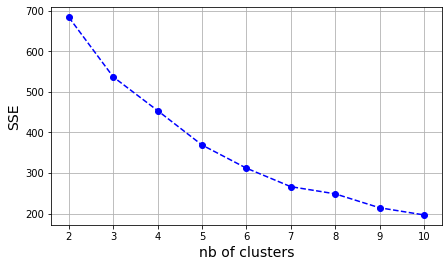

In [196]:
fig = plt.figure(figsize=(7, 4))
plt.plot(k_list,sse_list,'bo--')
plt.grid()
plt.xlabel("nb of clusters",fontsize=14)
plt.ylabel("SSE",fontsize=14)

In [197]:
km=KMeans(n_clusters=5)
km.fit(objects) # compute the clusters --> lancer le kmeans
centroids=km.cluster_centers_

sns.scatterplot(data=dataF3, x="Forest area", y="PM2.5 air pollution", hue='GDP')
# plot the centroids
sns.regplot(x=centroids[:,dataF3.columns.get_loc("Forest area")], y=centroids[:,dataF3.columns.get_loc("PM2.5 air pollution")],
            scatter=True, fit_reg=False, marker='x', scatter_kws={"s": 100}, color="r")

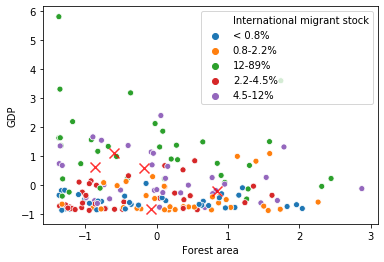

In [198]:
sns.scatterplot(data=dataF3, x="Forest area", y='GDP', hue='International migrant stock')
# plot the centroids
sns.regplot(x=centroids[:,dataF3.columns.get_loc("Forest area")], y=centroids[:,dataF3.columns.get_loc("PM2.5 air pollution")],
            scatter=True, fit_reg=False, marker='x', scatter_kws={"s": 100}, color="r")

### Étude de la stabilité de la convergence de K-means

## Hierarchical clustering (complete/single)

### Deandrograms for hierarchical clustering

## DBSCAN

# CLASSIFICATION

In [199]:
#X = dataF3.drop(['GDP'],axis=1)
#Y=dataF3['GDP']
X = dataF3.drop(['International migrant stock'],axis=1)
Y=dataF3['International migrant stock']

In [200]:
#On randomize la BD pour pouvoir avoir un jeu d'entrainement et un jeu test
#Random_state: on fixe la graine du générateur pseudo aléatoire
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=10)

In [201]:
#On vérifier la distribution 
Counter(Y_test)

Counter({'4.5-12%': 14,
         '0.8-2.2%': 12,
         '< 0.8%': 10,
         '12-89%': 11,
         '2.2-4.5%': 11})

In [202]:
dt= tree.DecisionTreeClassifier() #constructeur de decision tree 

In [203]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [204]:
Y_predict=dt.predict(X_test)

## Confusion matrix

In [205]:
#lignes vrai classes des objets
#colonnes classes des predits 
pd.crosstab(Y_test,Y_predict)

col_0,0.8-2.2%,12-89%,2.2-4.5%,4.5-12%,< 0.8%
International migrant stock,,,,,
0.8-2.2%,3,1,2,2,4
12-89%,2,3,0,5,1
2.2-4.5%,2,0,6,2,1
4.5-12%,3,2,2,6,1
< 0.8%,0,0,5,0,5


## Metrics

In [206]:
accuracy_score(Y_test,Y_predict)

0.39655172413793105

In [207]:
precision_score(Y_test,Y_predict,average="weighted"), precision_score(Y_test,Y_predict,average="macro")

(0.40114942528735636, 0.4033333333333333)

In [208]:
recall_score(Y_test,Y_predict,average="weighted"), recall_score(Y_test,Y_predict,average="macro")

(0.39655172413793105, 0.39935064935064934)

In [209]:
f1_score(Y_test,Y_predict,average="weighted"), f1_score(Y_test,Y_predict,average="macro")

(0.38914760835443496, 0.39110909374601055)

In [210]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

    0.8-2.2%       0.30      0.25      0.27        12
      12-89%       0.50      0.27      0.35        11
    2.2-4.5%       0.40      0.55      0.46        11
     4.5-12%       0.40      0.43      0.41        14
      < 0.8%       0.42      0.50      0.45        10

    accuracy                           0.40        58
   macro avg       0.40      0.40      0.39        58
weighted avg       0.40      0.40      0.39        58



In [ ]:
dataF=dataF.drop(['Unemployed female', 'Unemployed male','Population ages 0-14, female',
                  'Population ages 0-14, male','Population ages 15-64, female',
                  'Population ages 15-64, male','Suicide mortality rate, male',
                  'Suicide mortality rate, female','Employers female','Employers male',
                  'Labor force rate, male','Labor force rate, female',
                  'Labor force participation rate, male','Fertility rate',
                  'Maternal mortality ratio','Population ages 0-14','Population ages 15-64','Methane emissions',
                  'International migrant stock','Population, total''Number of death ages 5-14 years',
                  'Number of infant death','Labor force rate, total','Renewable energy','CO2 emissions',
                  'Birth rate','Methane emissions','International migrant stock','Population, total'],axis=1)